In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Abrimos el archivo con la tabla y mostramos las 5 primeras filas:
df=pd.read_excel('./Libros.xlsx')

In [3]:
df.head(5)

,Libro,Promedio de palabras,Links de referencias,Comentarios,Presentacion en video,Criticas negativas,Copias Vendidas
0,What is Machine Learning and how do we use it ...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,1742,9,2.0,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,962,6,7.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,1221,3,8.0,2,68,200000
4,Nasa finds entire solar system filled with eig...,2039,1,104.0,4,131,200000


In [4]:
# Conocemos la cantidad de filas y columnas que tiene el dataframe: 
print('Filas: ', df.shape[0])
print('Columnas: ', df.shape[1])

Filas:  161
Columnas:  7


In [5]:
# Mostramos las características de las columnas:
df.dtypes

Libro                      object
Promedio de palabras        int64
Links de referencias        int64
Comentarios               float64
Presentacion en video       int64
Criticas negativas          int64
Copias Vendidas             int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Libro                   161 non-null    object 
 1   Promedio de palabras    161 non-null    int64  
 2   Links de referencias    161 non-null    int64  
 3   Comentarios             159 non-null    float64
 4   Presentacion en video   161 non-null    int64  
 5   Criticas negativas      161 non-null    int64  
 6   Copias Vendidas         161 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 8.9+ KB


In [7]:
df.columns.to_list()

['Libro',
 'Promedio de palabras',
 'Links de referencias',
 'Comentarios',
 'Presentacion en video ',
 'Criticas negativas',
 'Copias Vendidas']

NULL VALUES

In [8]:
# Manipulamos los valores nulos del dataframe:
df.isnull()

,Libro,Promedio de palabras,Links de referencias,Comentarios,Presentacion en video,Criticas negativas,Copias Vendidas
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
156,False,False,False,False,False,False,False
157,False,False,False,False,False,False,False
158,False,False,False,False,False,False,False
159,False,False,False,False,False,False,False


In [9]:
df.isnull().sum().sort_values(ascending=False)

Comentarios               2
Libro                     0
Promedio de palabras      0
Links de referencias      0
Presentacion en video     0
Criticas negativas        0
Copias Vendidas           0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
# Conocemos la cantidad de filas que tiene el dataframe luego de eliminar valores nulos: 
print('Filas: ', df.shape[0])

Filas:  159


In [12]:
# Transformamos la variable 'Comentarios' a entero
df['Comentarios']=df['Comentarios'].astype('Int64')

ANÁLISIS EXPLORATORIO 

Libros

In [13]:
print('Cantidad de libros ', df.shape[0])

Cantidad de libros  159


Promedio de palabras

In [14]:
df['Promedio de palabras'].describe()

count     159.000000
mean     1818.924528
std      1145.108151
min       250.000000
25%       999.500000
50%      1718.000000
75%      2384.500000
max      8401.000000
Name: Promedio de palabras, dtype: float64

Text(0, 0.5, 'Frecuencia')

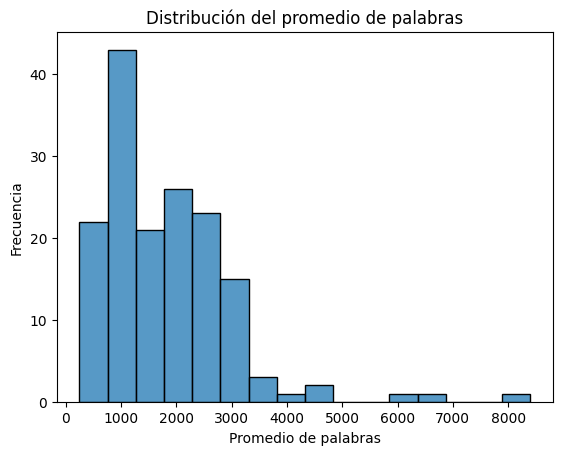

In [15]:
palabras_hist= sns.histplot(data=df['Promedio de palabras'])
palabras_hist.set_title('Distribución del promedio de palabras')
palabras_hist.set_xlabel('Promedio de palabras')
palabras_hist.set_ylabel('Frecuencia') 

Text(0.5, 1.0, 'Distribución del promedio de palabras')

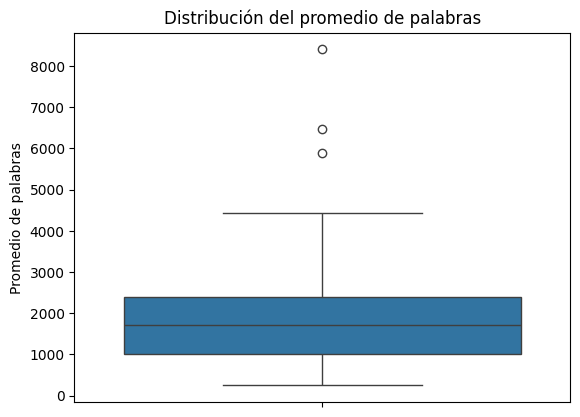

In [16]:
box_palabras=sns.boxplot(y='Promedio de palabras', data=df)
box_palabras.set_title('Distribución del promedio de palabras')

Poco más del 75% del promedio de páginas por libro es menor a 3000 páginas. El mínimo de páginas se ubica en 250, mientras que el máximo son más de 8000. Los libros con un promedio de páginas superiores a 5000 aproximadamente podrían ser considerados como valores atípicos.

Links de referencias 

In [17]:
df['Links de referencias'].describe()

count    159.000000
mean       9.792453
std       47.567417
min        0.000000
25%        3.000000
50%        5.000000
75%        7.000000
max      600.000000
Name: Links de referencias, dtype: float64

Text(0.5, 1.0, 'Distribución de links de referencias')

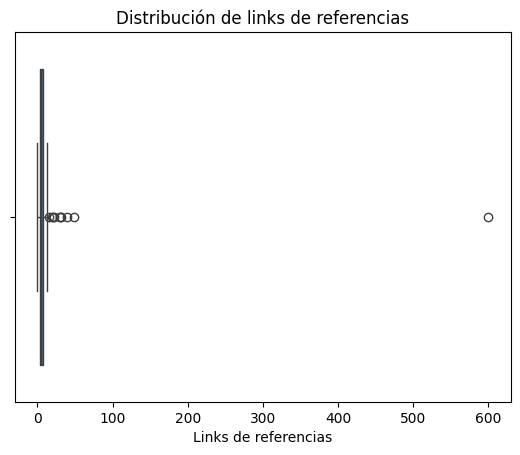

In [18]:
box_link=sns.boxplot(x='Links de referencias', data=df)
box_link.set_title('Distribución de links de referencias')

Podemos observar una gran diferencia entre el valor mínimo al valor máximo. El promedio de links de referencia por libro es 9 y la desviación estándar 47 lo que nos indicaría una importante variabilidad de datos.

Presentación en video

Text(0.5, 0, 'Presentaciones en video')

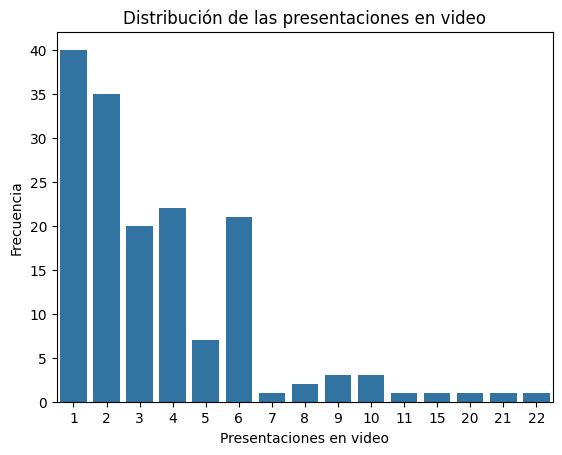

In [19]:
bar_videos=sns.countplot(x='Presentacion en video ', data=df)
bar_videos.set_title('Distribución de las presentaciones en video')
bar_videos.set_ylabel('Frecuencia')
bar_videos.set_xlabel('Presentaciones en video') 

Comentarios

In [20]:
df['Comentarios'].describe()

count        159.0
mean     10.100629
std      13.378707
min            0.0
25%            3.0
50%            7.0
75%           12.0
max          104.0
Name: Comentarios, dtype: Float64

Text(0, 0.5, 'Frecuencia')

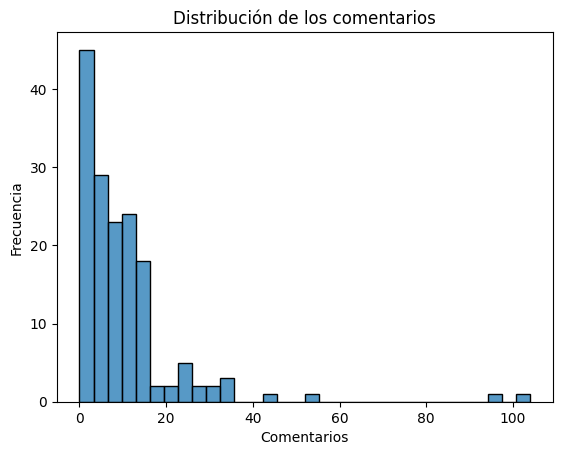

In [21]:
comentarios_hist= sns.histplot(data=df['Comentarios'])
comentarios_hist.set_title('Distribución de los comentarios')
comentarios_hist.set_xlabel('Comentarios')
comentarios_hist.set_ylabel('Frecuencia') 

El 50% de los libros no superan los 7 comentarios y el 75% no sobrepasa los 12. Podríamos decir que el echo de tener mas de 40 comentarios sería considerado atípico.

Criticas negativas 

In [22]:
df['Criticas negativas'].describe()

count     159.000000
mean       97.893082
std       115.034040
min         1.000000
25%        30.500000
50%        62.000000
75%       118.500000
max      1002.000000
Name: Criticas negativas, dtype: float64

Text(0, 0.5, 'Frecuencia')

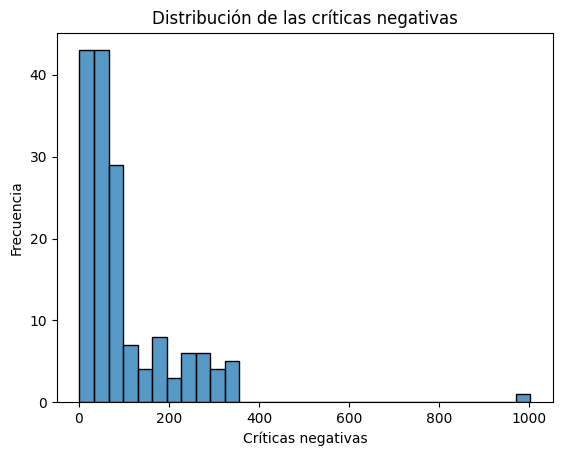

In [23]:
criticas_hist= sns.histplot(data=df['Criticas negativas'])
criticas_hist.set_title('Distribución de las críticas negativas')
criticas_hist.set_xlabel('Críticas negativas')
criticas_hist.set_ylabel('Frecuencia') 

Text(0.5, 1.0, 'Distribución de las críticas negativas')

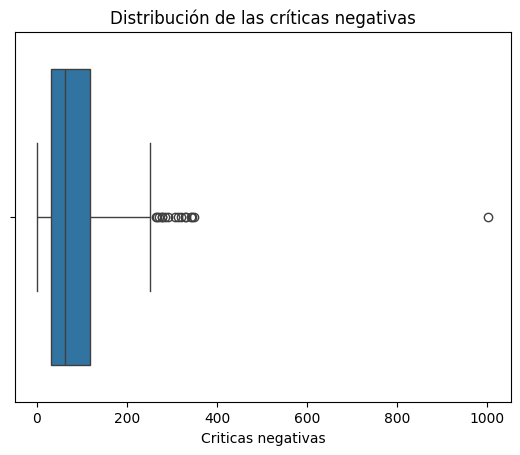

In [24]:
box_criticas=sns.boxplot(x='Criticas negativas', data=df)
box_criticas.set_title('Distribución de las críticas negativas')

Si bien hay una gran diferencia entre el valor mínimo y el máximo, esto se debe a la incidencia de valores atípicos. El promedio de criticas por libro es de 97 y posee una alta desviación estándar de más de 100 criticas.

Copias Vendidas

In [25]:
# Pasamos la variable de cantidades vendidas a miles:
df['Copias Vendidas']= df['Copias Vendidas'].apply(lambda x:x/1000)

In [26]:
df['Copias Vendidas'].describe()

count    159.000000
mean      28.231346
std       43.607548
min        0.000000
25%        2.800000
50%       16.641000
75%       36.199000
max      350.000000
Name: Copias Vendidas, dtype: float64

Text(24.000000000000007, 0.5, 'Frecuencia')

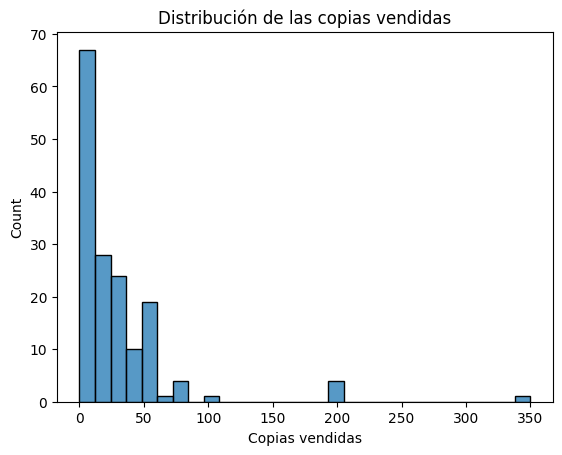

In [27]:
copias_hist= sns.histplot(data=df['Copias Vendidas'])
copias_hist.set_title('Distribución de las copias vendidas')
copias_hist.set_xlabel('Copias vendidas')
criticas_hist.set_ylabel('Frecuencia') 

Text(0.5, 1.0, 'Distribución de las copias vendidas')

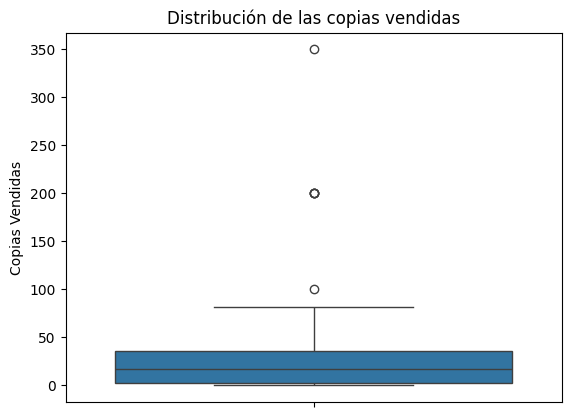

In [28]:
box_ventas=sns.boxplot(y='Copias Vendidas', data=df)
box_ventas.set_title('Distribución de las copias vendidas')

Casi la totalidad de los libros no superan las 100 mil copias vendidas, solo hay casos excepcionales que lo hacen. El promedio es de 28 mil y el 75% de los libros alcanzan las 38 mil copias vendidas.

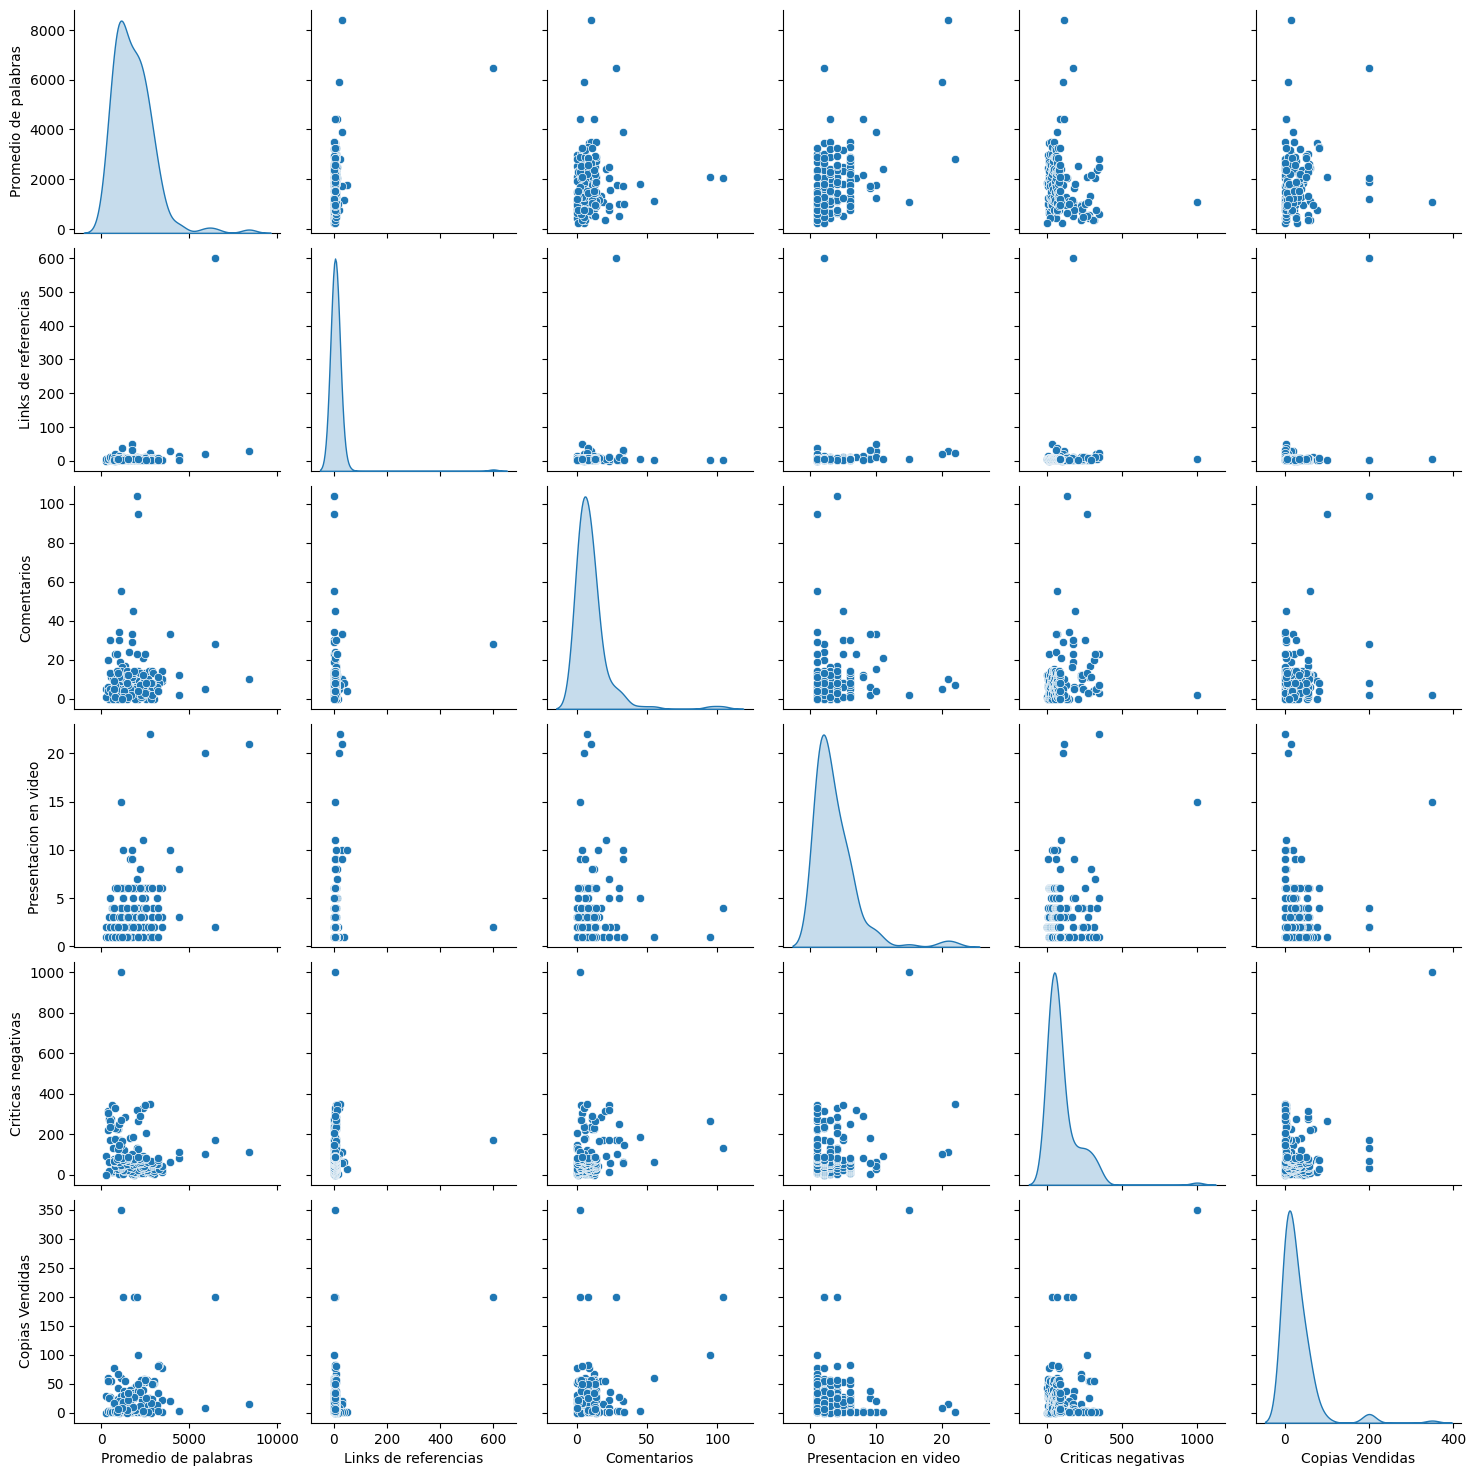

In [29]:
pair_plot_df=sns.pairplot(df, diag_kind='kde')

In [30]:
df_corr=df[['Promedio de palabras', 'Links de referencias','Comentarios','Presentacion en video ','Criticas negativas','Copias Vendidas']]
df_corr.corr()

,Promedio de palabras,Links de referencias,Comentarios,Presentacion en video,Criticas negativas,Copias Vendidas
Promedio de palabras,1.000000,0.347120,0.058530,0.460627,-0.166479,0.137580
Links de referencias,0.347120,1.000000,0.104161,0.020441,0.059367,0.288242
Comentarios,0.058530,0.104161,1.000000,0.016662,0.149491,0.240563
Presentacion en video,0.460627,0.020441,0.016662,1.000000,0.211697,0.058266
Criticas negativas,-0.166479,0.059367,0.149491,0.211697,1.000000,0.327028
Copias Vendidas,0.137580,0.288242,0.240563,0.058266,0.327028,1.000000


Text(0.5, 1.0, 'Correlaciones')

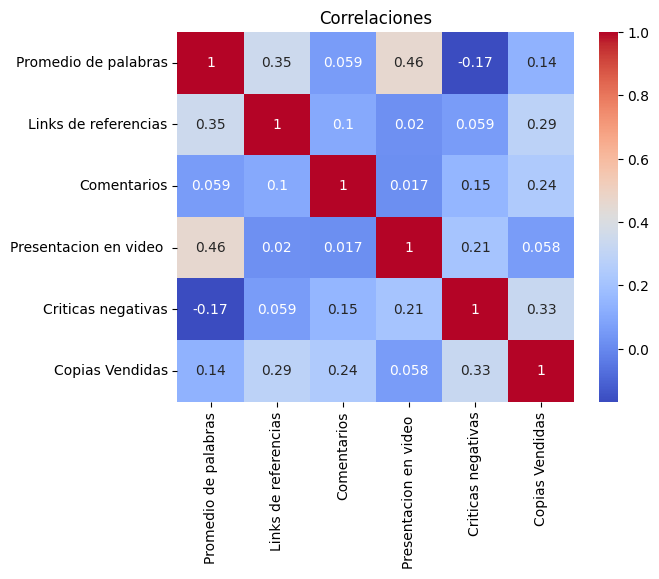

In [31]:
corr_heatmap=sns.heatmap(df_corr.corr(),cbar= True, cmap='coolwarm', annot = True)
plt.title('Correlaciones')

Las críticas negativas tiene la correlación positiva más alta con la variable de salida, la misma es de 0.33 si bien es la más alta entre todas las demás variables, es una leve correlación positiva. Con unos puntos menos, la variables link de referencias y comentarios también tiene una correlación positiva aunque leve también.